In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

In [35]:
path = "/content/drive/MyDrive/MSTAR/sharpened_bm3d"

img_height, img_width = 32, 32
num_classes = 4

images = []
labels = []

# **Preprocessing Datas**

In [36]:
for class_idx, class_name in enumerate(os.listdir(path)):
    class_path = os.path.join(path, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_height, img_width))
            images.append(img)
            labels.append(class_idx)

In [37]:
images = np.array(images)
labels = np.array(labels)

In [38]:
images = images.astype('float32') / 255.0
labels = to_categorical(labels, num_classes)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1)
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1)

# **LeNet-5 Architecture**
I took the LeNet-5 architecture as an example when building the model
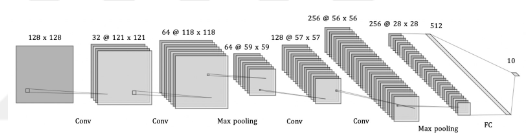

In [40]:
def lenet5(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))

    model.add(layers.Conv2D(6, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

input_shape = (img_height, img_width, 1)
model = lenet5(input_shape, num_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,196 (239.05 KB)

 Trainable params: 61,196 (239.05 KB)

 Non-trainable params: 0 (0.00 B)

# **Training**

In [41]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3575 - loss: 1.3040 - val_accuracy: 0.4690 - val_loss: 1.1130
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5713 - loss: 0.9568 - val_accuracy: 0.8363 - val_loss: 0.6518
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7836 - loss: 0.5846 - val_accuracy: 0.8894 - val_loss: 0.3769
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8836 - loss: 0.3459 - val_accuracy: 0.8827 - val_loss: 0.3464
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8944 - loss: 0.3018 - val_accuracy: 0.8894 - val_loss: 0.3167
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9121 - loss: 0.2692 - val_accuracy: 0.9270 - val_loss: 0.2074
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9127 - loss: 0.2515 - val_accuracy: 0.8938 - val_loss: 0.3035
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9378 - loss: 0.1906 - val_accuracy: 0.9491 - v

# **Confusion Matrix And Accuracy (Testing)**

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [43]:
y_pred = model.predict(X_test)

y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


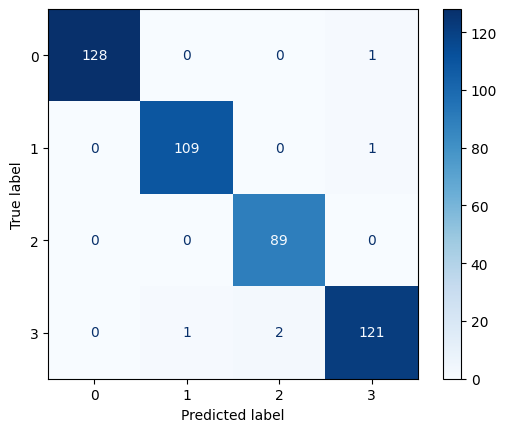

In [44]:
cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

15/15 - 0s - 12ms/step - accuracy: 0.9889 - loss: 0.0376
Test accuracy: 0.9889
